# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-63, 64, 65 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Photoeffekt

Name: Vrkic Vorname: Tin E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Nock Vorname: Mika E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo-32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Denis Benâtre

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 27.05.24

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

In [2]:
# importieren aller benötigten Module
import matplotlib.pyplot as plt 
import numpy as np 
import kafe2
import pathlib
import pandas as pd
from uncertainties import ufloat

# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[]):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    fit.add_error(axis = 'x', err_val = xy_error[0])
    fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

## Aufgabe 1: Grundlagen

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Machen Sie sich mit dem zu untersuchenden Effekt und der Art, wie Sie ihn beobachten und messen werden vertraut. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Qualitative Beobachtung des äußeren photoelektrischen Effekts

Beobachten Sie den äußeren Photoeffekt mit Hilfe des bereitstehenden statischen Elektrometers (E), der $\mathrm{Zn}$-Platte (Zn) und der $\mathrm{Hg}$-Dampflampe (Hg) qualitativ. Gehen Sie dabei wie folgt vor: 

 * Laden Sie Zn negativ auf und beobachten Sie E ohne Zn mit Hg zu bestrahlen. 
 * Laden Sie Zn negativ auf und beobachten Sie E, wenn Sie Zn mit Hg bestrahlen.
 * Laden Sie Zn negativ auf und beobachten Sie E, wenn Sie Zn mit Hg bestrahlen und zusätzlich eine positiv geladene Elektrode in die Nähe von Zn bringen.
 * Laden Sie Zn positiv auf und beobachten Sie E, wenn Sie Zn mit Hg bestrahlen.

Beschreiben und erklären Sie Ihre Beobachtungen. 

---

After charging up the electrometer, the following things happen in the cases mentioned above

- With a negatively charged plate, the electrons leak a litle in the environment (for example in coronal discharges) and the electrometer discharges very slowly over time. The half-life was so high, we couldn't measure it appropriately. 
- With a lightray, the electrometer discharged faster, with half-life of ca. $2 min.$ That is the cause, because electrons will be knocked out of the plate by the incoming photons and more of them can escape in the environment. 
- If you approach with a positively charged electrode, the discharge will get much faster again, because the electrons, that get knocked out by the photons, are sucked up into the electrode and don't form a charged cloud. The half-life in this case was about $20s.$
- When the electrometer get's charged up positively, it isn't affected by the incoming photons. When positively charged, there are no longer electrons, that can be knocked out by the loght and the charge is held. 

---

### Aufgabe 1.2: Charakterisierung des für die folgenden Aufgaben zu verwendenden Elektrometers

 * Nehmen Sie einen Nullabgleich des für **Aufgabe 2** zu verwendenden Elektrometers vor. 
 * Bestimmen Sie den Innenwiderstand $R_{i}$ des Elektrometers mit Hilfe der vorhandenen Vorwiderstände von $R_{V}=0.01,\, 0.1,\, 1$ und $10\,\mathrm{G\Omega}$. 

---

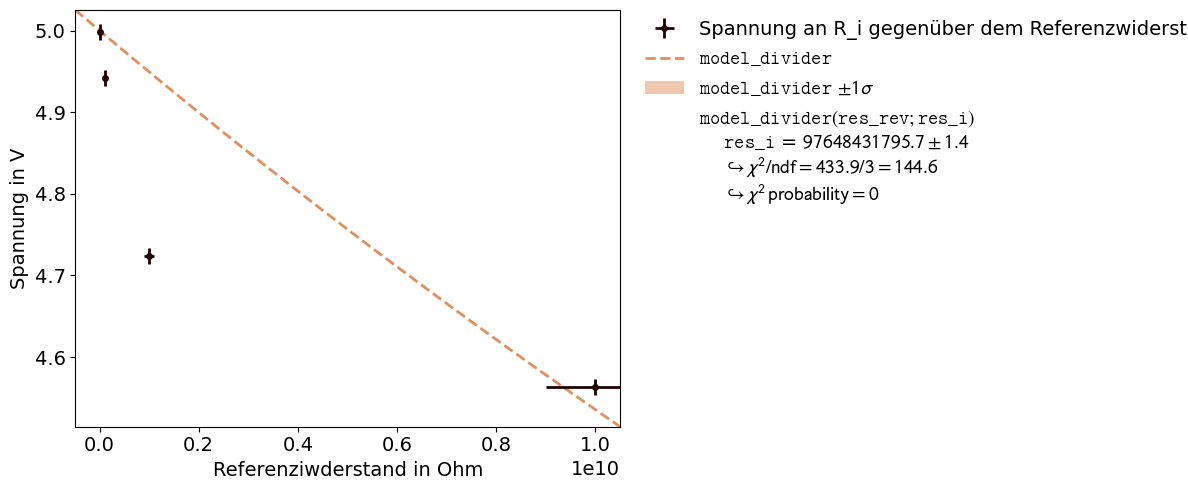

In [28]:
def model_divider(res_rev,res_i):
    return U_0 * res_i / (res_rev+res_i)

res_rev = np.array([10,100,1000,10000]) * 10**6 #in Ohm
U_e = np.array([4.998,4.942,4.724,4.563])
U_0 = 5

xy_data = kafe2.XYContainer(res_rev,U_e)
xy_data.label = 'Spannung an R_i gegenüber dem Referenzwiderstand'
fit = kafe2.XYFit(xy_data = xy_data, model_function = model_divider)
fit.add_error('x', err_val = 0.1, relative = True)
fit.add_error('y', err_val = 0.01)
fit.do_fit()

plot = kafe2.Plot(fit)
plot.x_label = "Referenziwderstand in Ohm"
plot.y_label = "Spannung in V"
plot.plot()
plt.show()

The elctrometer was adjusted to zero for an amplification of $10^2$. The main problem were fluctuations, that were hard to control and the fact, that an adjustment for values over $10^2$ didn't hold, when we turned down again. Instead it showed values of around $4V$.

The inner resistance of the mesuring device was determined with a voltage divider. Some known Resistors were plugged in series to the inner Resistance and the voltagedrop across the inner resistor was mesured. With a fit, the inner Resistance is the determined.

In this case, the Resistance is calculated to $R_i = 9.76 \cdot 10^{10}\Omega$, which is about three orders of magnitude different from the actual value $R_i \geq 10^{13}$ written on the electrometer. It can't be determined, why this error occurs. 

---

## Aufgabe 2: Bestimmung von $h$

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Bestimmen Sie $h$ aus dem äußeren photoelektrischen Effekt mit Hilfe von zwei verschiedenen Schaltungen. 
 - Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Spannung $U_{\mathrm{Ph}}$ der Photozelle bei variierender Lichtfrequenz

 * Tragen Sie die sich von selbst einstellende maximale Spannung $U_{\mathrm{Ph}}$ der Photozelle bei Bestrahlung mit Licht der Wellenlängen $\lambda_{\mathrm{CWL}}^{(i)}$ bei maximaler Lichtintensivität auf. 
 * Verwenden Sie die folgenden sechs Wellenlängen der zur Verfügung stehenden Filter: $\lambda_{\mathrm{CWL}}^{(i)} = 360,\,400,\,440,\,490,\,540,\,590\,\mathrm{nm}$.
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells.

---

In [ ]:
U_1 = np.array([0.794,0.765,0.708,0.633,0.569,0.472])
U_2 = np.array([0.793,0.765,0.709,0.633,0.569,0.473])
U_3 = np.array([0.793,0.764,0.709,0.634,0.569,0.472])
U_4 = np.array([0.794,0.765,0.709,0.634,0.569,0.472])
lam = np.array([360,400,440,490,540,590])

U_list = 

U_std = np.array([0.001])
U_std = 0.01


---

### Aufgabe 2.2: Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ bei variierender Lichtintensität

 - Tragen Sie für $\lambda_{\mathrm{CWL}}=400\,\mathrm{nm}$ den Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ auf.
 - Bestimmen Sie durch Anpassung eines geeigneten Modells den Wert von $U(I_{\mathrm{Ph}}=0)$ im Nahbereich des Nulldurchgangs. 
 - Folgen Sie den vorgenannten Punkten einmal für die maximale und einmal für eine bei mittels eines Graufilters reduzierte Lichtintensität. 
 - Bestimmen Sie die Abnahme der Lichtintensität durch den Filter.

---

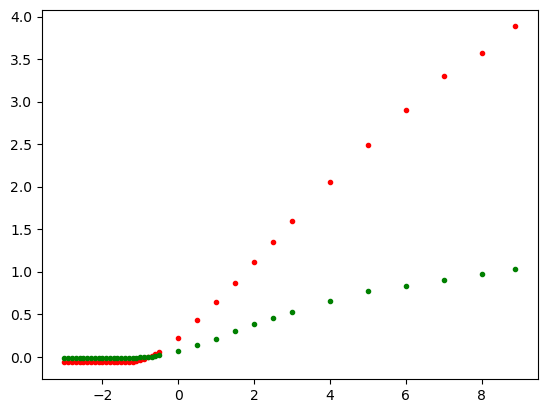

In [18]:
U_e_hi = np.array([-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.067,-0.067,-0.067,
                    -0.066,-0.065,-0.064,-0.061,-0.057,-0.049,-0.039,-0.026,-0.008,0.0113,0.034,0.061,
                    0.225,0.432,0.639,0.866,1.111,1.353,1.597,
                    2.060,2.490,2.905,3.300,3.570,3.883]) #in V
U_e_lo = np.array([-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,-0.014,
                    -0.014,-0.014,-0.014,-0.014,-0.013,-0.011,-0.009,-0.006,-0.002,0.002,0.008,0.015,
                    0.067,0.133,0.213,0.300,0.383,0.457,0.526,
                    0.660,0.770,0.837,0.901,0.971,1.030]) #in V
U_0 = np.array([-3,-2.9,-2.8,-2.7,-2.6,-2.5,-2.4,-2.3,-2.2,-2.1,-2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.,-0.9,-0.8,-0.7,-0.6,-0.5,
                    0.,0.5,1.,1.5,2.,2.5,3,
                    4.,5.,6.,7.,8.,8.89]) #in V
U_std = 0.01

plt.plot(U_0,U_e_hi, "r.")
plt.plot(U_0,U_e_lo, "g.")
plt.show()

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

### Aufgabe 2.3: Spannung $U_{o}(I_{\mathrm{Ph}}=0)$ bei variierender Lichtfrequenz

 * Bestimmen Sie für die in **Aufgabe 2.1** verwendeten Wellenlängen $\lambda^{(i)}_{\mathrm{CWL}}$ jeweils die Spannung $U^{(i)}(I_{\mathrm{}Ph}=0)$. 
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells und vergleichen Sie mit dem Ergebnis aus **Aufgabe 2.1**.
 
---

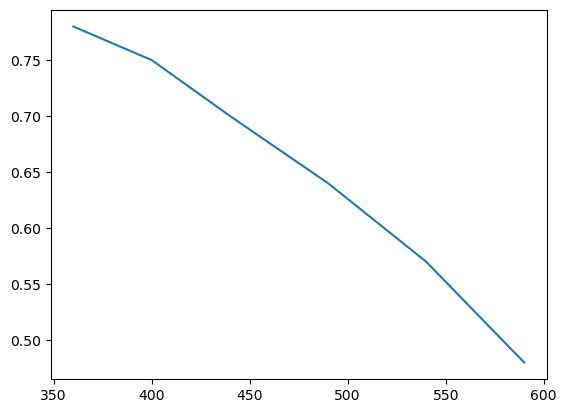

In [ ]:
lam = np.array([360,400,440,490,540,590])
U_0 = np.array([0.78,0.75,0.70,0.64,0.57,0.48])

plt.plot(lam,U_0)
plt.show()

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---